# Analyze tweets for sentiment
A simple project to analayze tweets by topic in different areas of the World

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
import os, sys

In [3]:
positive_reviews = []
pos_path = '/Users/andrewcodispoti/Downloads/review_polarity/txt_sentoken/pos'
for pos_file in os.listdir(pos_path):
    with open(os.path.join(pos_path, pos_file)) as f:
        positive_reviews.append(f.readlines())

In [4]:
negative_reviews = []
neg_path = '/Users/andrewcodispoti/Downloads/review_polarity/txt_sentoken/neg'
for neg_file in os.listdir(neg_path):
    with open(os.path.join(neg_path, neg_file)) as f:
        negative_reviews.append(f.readlines())

In [5]:
positive_reviews = ["".join(x).replace('\n', '') for x in positive_reviews]
negative_reviews = ["".join(x).replace('\n', '') for x in negative_reviews]

Now we have our reviews relatively clean and in a form that we can tokenize them

## Tokenize reviews

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf=True)

In [7]:
training_counts = vect.fit_transform(positive_reviews + negative_reviews)

In [8]:
full_data = positive_reviews + negative_reviews

In [9]:
training_Y = [1] * 1000 + [-1] * 1000

## Train a classifier on the number of occurences of each word

In [10]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(training_counts, training_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
def predict(sentence):
    d = vect.transform([sentence])
    return classifier.predict(d)

In [12]:
predict("terrible product, would buy again")

array([-1])

## Test with some randomly selected training data

In [13]:
indices = [np.random.randint(2000) for x in xrange(10)]
test_data = [full_data[x] for x in indices]

In [14]:
indices

[1884, 1477, 203, 1028, 1221, 847, 280, 641, 1396, 1626]

In [15]:
indices_mask = pd.Series(indices) < 1000

In [16]:
predictions = classifier.predict(vect.transform(test_data))
for x, y, z in zip(test_data, predictions, indices_mask):
    print "Predicted Sentiment : {}, Actual Sentiment:{}\n\n{}".format("Positive" if y > 0 else "Negative", "Positive" if z > 0 else "Negative", x)

Predicted Sentiment : Negative, Actual Sentiment:Negative

for those interested in the true spirit of moviemaking - or what's left of it in mainstream hollywood - movie which are star vehicles are terrible things . as a rule , the ignore general principles of cinema because they are not made to advance the media but rather to advance the career of a particular actor . an actor might be chosen on the up-and-up , to give him exposure ; or he might be chosen on the way down to hand him a paycheck . generally , though , the actor doesn't matter , and soldier , the latest from the beleaguered warner brothers , exemplifies this : the picture lacks pizazz . the star for the vehicle in this case is kurt russell , otherwise known as the man of thirty words or less . russell plays todd , a human trained from birth in the ways of waging war and becoming emotionally distanced from the carnage he has wrought . the movie lets us see this degenerate process , but by the time the real plot starts , we

## Get some actual data from Twitter

In [17]:
import twitter
tweets_dump=[]

In [18]:
api = twitter.Api(consumer_key='fmxnG63GbBwWLtlWyVbYKSvWq',
consumer_secret='amrz2mFViLIHoNblxdfxmPqA1l4Wuizvh41IIa57FBST41E1f9',
access_token_key='69760726-pXsCljdTmcBZriMPSsIoMs9dm7yWr8hmKwfaU7ZaH',
access_token_secret='GFL4cL19wLjcLpmUBB1h8ozyigOlFyCHX15GIAVcAs1SO')
api.VerifyCredentials()

User(ID=69760726, ScreenName=Andrewcod749)

In [19]:
locations=["-134.494634,25.981380,-61.219793,48.994509"]

In [20]:
def get_new_tweet_data():
    stream = api.GetStreamFilter(track=["election"],locations=locations)
    tweets = [stream.next() for x in xrange(40)]
    tweet_text = [x['text'].replace('\n', '') for x in tweets]
    input_data = vect.transform(tweet_text)
    predictions = classifier.predict(input_data)
    for x in zip(tweet_text, predictions):
        print "{} => {}".format("Positive" if x[1] > 0 else "Negative", x[0].encode('utf-8'))
    tweets_dump.extend(zip(tweets, predictions))

In [36]:
import time
for x in xrange(5):
    print "Iteration %s" % x
    get_new_tweet_data()
    time.sleep(10)

Iteration 0
Negative => I wish #BernieSanders was the elected  nominee. #DNC say no to #Superdelegate #RiggedSystem #RiggedPrimary… https://t.co/syZvqUmqDM
Negative => So let me get this straight...the fact that Donald Trump is going to win this election has to do with white supremacy?
Positive => RT @TrrumpTheType: #TrumpTheType to win the election and have a threesome with his daughter &amp; son to Celebrate
Negative => Bout to join the army and move to the U.K.
Negative => Our children deserve better than what's in store for this country.
Positive => Maybe election fraud and ballott stealing and voter machine rigging and voter roll purging will get the attention... https://t.co/oZvb3zx5DD
Negative => RT @CNN: .@VanJones68 on Russia: This is the first election where an enemy power explicitly interfered and got away with it https://t.co/wJ…
Positive => RT @guardian: US election 2016: Donald Trump poised to defeat Hillary Clinton – live https://t.co/Zk40wBl9BR #ElectionNight
Negative =

KeyError: 'text'

In [42]:
%matplotlib inline

In [43]:
sentiments = [x[1] for x in tweets_dump]

In [44]:
from collections import Counter
c= Counter(sentiments)
(c[-1],c[1])

(384, 256)

In [45]:
np.arange(2)

array([0, 1])

[<matplotlib.text.Text at 0x1149cda50>, <matplotlib.text.Text at 0x114aabe10>]

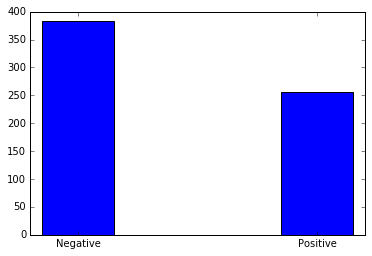

In [46]:
fig,ax = plt.subplots()
width=0.3
ax.bar(np.arange(2), (c[-1],c[1]),align='center', width=width)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(("Negative", "Positive"))